<h1 align=center><font size = 5>Transformer</h1 >


<h3>Objective for this Notebook</h3>
<h5> 1. 觀看架構圖，試著撰寫出模型</h5>
<hr>

 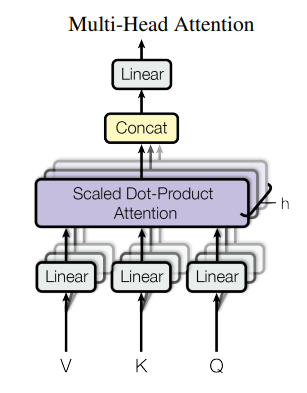
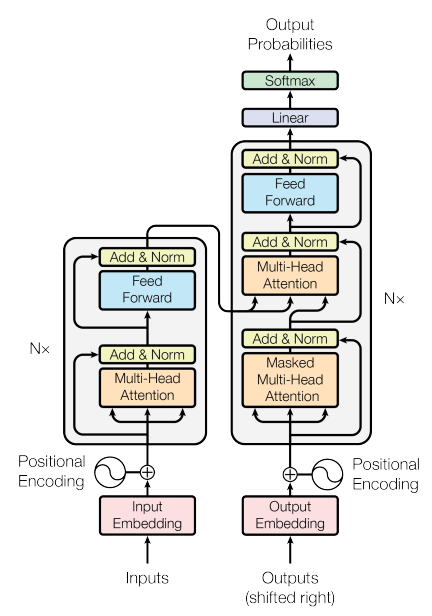

In [7]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import math

In [ ]:
class MultiheadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()


        #assert self.head_dim * num_heads == embed_dim, "Embedding size must be divisible by num_heads"

        # Query, Key, Value 投影


        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape  # B: 批次大小, T: 序列長度, C: 內部維度

        # (1) 生成 Q, K, V



        # (2) 計算注意力分數

            #attention_weights = F.softmax(attention_scores, dim=-1)  # softmax 變成權重
            #ttention_weights = self.dropout(attention_weights)  # 避免過擬合

        # (3) 加權求和 V



        # (4) 最後輸出變換



        return

class PositionalEncoding(nn.Module):
    def __init__(self, embed_dim, max_len=5000):
        super().__init__()
        pe = torch.zeros(max_len, embed_dim)
        position = torch.arange(0, max_len, dtype=torch.float).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, embed_dim, 2).float() * (-math.log(10000.0) / embed_dim))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class LayerNorm(nn.Module):
    def __init__(self, embed_dim, eps=1e-5):
        super().__init__()
        self.gamma = nn.Parameter(torch.ones(embed_dim))
        self.beta = nn.Parameter(torch.zeros(embed_dim))
        self.eps = eps

    def forward(self, x):
        mean = x.mean(dim=-1, keepdim=True)
        std = x.std(dim=-1, keepdim=True)
        return self.gamma * (x - mean) / (std + self.eps) + self.beta


class ResidualConnection(nn.Module):
    def __init__(self, embed_dim, dropout=0.1):
        super().__init__()
        self.norm = LayerNorm(embed_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, sublayer):
        return x + self.dropout(sublayer(self.norm(x)))

class FeedForward(nn.Module):
    def __init__(self, embed_dim, hidden_dim):
        super().__init__()
        self.fc1 = nn.Linear(embed_dim, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, embed_dim)

    def forward(self, x):
        return self.fc2(F.relu(self.fc1(x)))

# 雙擊展開正確答案

<!--
class MultiheadAttention(nn.Module):
    def __init__(self, embed_dim, num_heads, dropout=0.1):
        super().__init__()
        self.embed_dim = embed_dim  # 整體詞嵌入維度
        self.num_heads = num_heads  # 多頭數量
        self.head_dim = embed_dim // num_heads  # 每個 head 的維度

        assert self.head_dim * num_heads == embed_dim, "Embedding size must be divisible by num_heads"

        # Query, Key, Value 投影
        self.qkv_proj = nn.Linear(embed_dim, embed_dim * 3)  # 一次性生成 Q, K, V
        self.out_proj = nn.Linear(embed_dim, embed_dim)  # 最後輸出的線性變換
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B, T, C = x.shape  # B: 批次大小, T: 序列長度, C: 內部維度

        # (1) 生成 Q, K, V
        qkv = self.qkv_proj(x)  # (B, T, 3*C)
        qkv = qkv.reshape(B, T, 3, self.num_heads, self.head_dim)  # (B, T, 3, h, d_h)
        qkv = qkv.permute(2, 0, 3, 1, 4)  # (3, B, h, T, d_h) -> 3 表示 Q, K, V
        Q, K, V = qkv[0], qkv[1], qkv[2]  # 分別取出 Q, K, V

        # (2) 計算注意力分數
        attention_scores = (Q @ K.transpose(-2, -1)) / math.sqrt(self.head_dim)  # (B, h, T, T)
        attention_weights = F.softmax(attention_scores, dim=-1)  # softmax 變成權重
        attention_weights = self.dropout(attention_weights)  # 避免過擬合

        # (3) 加權求和 V
        context = (attention_weights @ V)  # (B, h, T, d_h)
        context = context.permute(0, 2, 1, 3).reshape(B, T, C)  # (B, T, C)

        # (4) 最後輸出變換
        output = self.out_proj(context)
        return output

-->

 ![Transformer1.png](attachment:Transformer1.png)

In [ ]:
class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super().__init__()




    def forward(self, x):

        return x

class TransformerDecoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super().__init__()





    def forward(self, x, memory):



        return x

class Transformer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, num_layers):
        super().__init__()





    def forward(self, src, tgt):
        memory = src
        for layer in self.encoder:
            memory = layer(memory)

        output = tgt
        for layer in self.decoder:
            output = layer(output, memory)

        return output



# 雙擊展開正確答案

<!--
class TransformerEncoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super().__init__()
        self.self_attn = MultiheadAttention(embed_dim, num_heads)
        self.ffn = FeedForward(embed_dim, hidden_dim)
        self.res1 = ResidualConnection(embed_dim, dropout)
        self.res2 = ResidualConnection(embed_dim, dropout)

    def forward(self, x):
        x = self.res1(x, lambda x: self.self_attn(x))
        x = self.res2(x, self.ffn)
        return x

class TransformerDecoderLayer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, dropout=0.1):
        super().__init__()
        self.self_attn = MultiheadAttention(embed_dim, num_heads)
        self.cross_attn = MultiheadAttention(embed_dim, num_heads)
        self.ffn = FeedForward(embed_dim, hidden_dim)
        self.res1 = ResidualConnection(embed_dim, dropout)
        self.res2 = ResidualConnection(embed_dim, dropout)
        self.res3 = ResidualConnection(embed_dim, dropout)

    def forward(self, x, memory):
        x = self.res1(x, lambda x: self.self_attn(x))
        x = self.res2(x, lambda x: self.cross_attn(x, memory, memory))
        x = self.res3(x, self.ffn)
        return x

class Transformer(nn.Module):
    def __init__(self, embed_dim, num_heads, hidden_dim, num_layers):
        super().__init__()
        self.encoder = nn.ModuleList([TransformerEncoderLayer(embed_dim, num_heads, hidden_dim) for _ in range(num_layers)])
        self.decoder = nn.ModuleList([TransformerDecoderLayer(embed_dim, num_heads, hidden_dim) for _ in range(num_layers)])

    def forward(self, src, tgt):
        memory = src
        for layer in self.encoder:
            memory = layer(memory)

        output = tgt
        for layer in self.decoder:
            output = layer(output, memory)

        return output

-->